<a href="https://colab.research.google.com/github/Deeksha-Pandit/EVA4-Phase2/blob/master/Session3_FaceRec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import dlib
import cv2
import numpy as np
#from renderFace import renderFace
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [ ]:
matplotlib.rcParams['figure.figsize']=(6.0,6.0)
matplotlib.rcParams['image.cmap']='gray'

In [ ]:
def writeLandmarksToFile(landmarks, landmarksFileName):
  with open(landmarksFileName,'w') as f:
    for p in landmarks.parts():
      f.write("%s %s\n" %(int(p.x),int(p.y)))
  f.close()

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

--2020-08-11 16:59:38--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_  42%[=======>            ]  25.69M  1.55MB/s    in 45s     

2020-08-11 17:00:23 (585 KB/s) - Connection closed at byte 26941176. Retrying.

--2020-08-11 17:00:24--  (try: 2)  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 64040097 (61M), 37098921 (35M) remaining
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[++++++++===========>]  61.07M  11.5MB/s    in 3.1s    

2020-08-11 17:00:27 (11.5 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/640400

In [ ]:
# Landmark model location
PREDICTOR_PATH = "/content/shape_predictor_68_face_landmarks.dat"

In [ ]:
# Get the face detector instance
faceDetector = dlib.get_frontal_face_detector()

In [ ]:
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

#Read the image
imageFilename = "/content/family.jpg"
im = cv2.imread(imageFilename)

# Landmarks will be stored in results/family.txt
landmarksBasename = "/content/results/family"

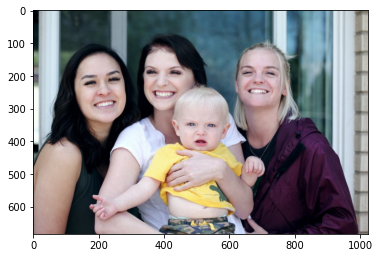

In [ ]:
plt.imshow(im[:,:,::-1])
plt.show()

In [ ]:
# Detect faces in the image
faceRects = faceDetector(im,0)
print("No of faces detected:", len(faceRects))

#List to store landmarks of all detected faces
landmarksAll = []

No of faces detected: 4


In [ ]:
def drawPolyline(im, landmarks, start, end, isClose=False):
  points=[]
  for i in range(start, end+1):
    point = [landmarks.part(i).x,landmarks.part(i).y]
    points.append(point)
  points = np.array(points, dtype = np.int32)
  cv2.polylines(im, [points], isClose, (225,200,0), thickness = 2,lineType = cv2.LINE_8)

In [ ]:
def renderFace(im, landmarks):
  assert(landmarks.num_parts ==68)
  drawPolyline(im, landmarks, 0 ,16)
  drawPolyline(im, landmarks, 17 ,21)
  drawPolyline(im, landmarks, 22 ,26)
  drawPolyline(im, landmarks, 27 ,30)
  drawPolyline(im, landmarks, 30 ,35, True)
  drawPolyline(im, landmarks, 36 ,41, True)
  drawPolyline(im, landmarks, 42 ,47, True)
  drawPolyline(im, landmarks, 48 ,59, True)
  drawPolyline(im, landmarks, 60 ,67, True)

In [ ]:
!wget https://github.com/spmallick/PyImageConf2018/blob/master/faceBlendCommon.py

--2020-08-12 03:28:22--  https://github.com/spmallick/PyImageConf2018/blob/master/faceBlendCommon.py
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘faceBlendCommon.py’

faceBlendCommon.py      [  <=>               ] 169.61K   315KB/s    in 0.5s    

2020-08-12 03:28:23 (315 KB/s) - ‘faceBlendCommon.py’ saved [173680]



In [ ]:
!wget http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_5_face_landmarks.dat.bz2

--2020-08-12 03:33:33--  http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5706710 (5.4M)
Saving to: ‘shape_predictor_5_face_landmarks.dat.bz2’

shape_predictor_5_f 100%[===================>]   5.44M  1.51MB/s    in 3.8s    

2020-08-12 03:33:37 (1.44 MB/s) - ‘shape_predictor_5_face_landmarks.dat.bz2’ saved [5706710/5706710]



In [ ]:

# Loop over all detected face rectangles
for i in range(0, len(faceRects)):
  newRect = dlib.rectangle(int(faceRects[i].left()),
                          int(faceRects[i].top()),
                          (faceRects[i].right()),
                           (faceRects[i].bottom()))
  # for each face rectangle, run landmarkDetector
  landmarks = landmarkDetector(im, newRect)
  # Print number of landmarks
  if i == 0:
    print("No. of landmarks: ",len(landmarks.parts()))

  # Store landmarks for current face
  landmarksAll.append(landmarks)

  #next we render the outline of the face using detected landmarks
  renderFace(im, landmarks)

  # the code now saves all landmarks to results/family_0.txt ...
  landmarksFileName = landmarksBasename+"_"+str(i)+".txt"
  print("Saving landmarks to",landmarksFileName)
  # WRite landmarks to disk
  writeLandmarksToFile(landmarks, landmarksFileName)

No. of landmarks:  68
Saving landmarks to /content/results/family_0.txt
Saving landmarks to /content/results/family_1.txt
Saving landmarks to /content/results/family_2.txt
Saving landmarks to /content/results/family_3.txt


In [ ]:
outputFileName = "results/familyLandmarks.jpg"
print("Saving output to", outputFileName)
cv2.imwrite(outputFileName,im)

Saving output to results/familyLandmarks.jpg


True

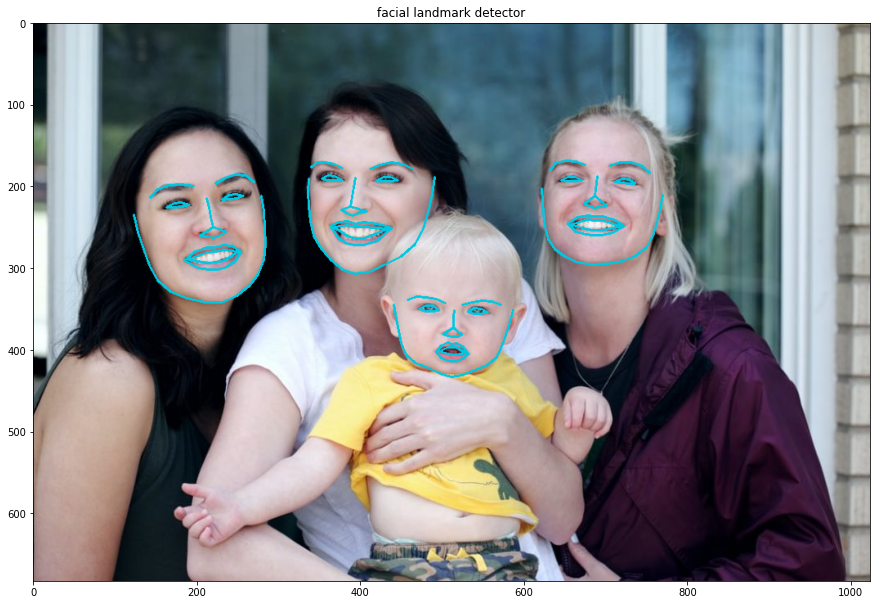

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(im[:,:,::-1])
plt.title("facial landmark detector")
plt.show()

In [ ]:
# 5 POINT MODEL

In [ ]:
!wget http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_5_face_landmarks.dat.bz2

--2020-08-11 18:13:45--  http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5706710 (5.4M)
Saving to: ‘shape_predictor_5_face_landmarks.dat.bz2’

shape_predictor_5_f 100%[===================>]   5.44M  3.71MB/s    in 1.5s    

2020-08-11 18:13:47 (3.71 MB/s) - ‘shape_predictor_5_face_landmarks.dat.bz2’ saved [5706710/5706710]



In [ ]:
import numpy as np
import dlib
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(6.0,6.0)
matplotlib.rcParams['image.cmap']='gray'

In [ ]:
PREDICTOR_PATH = "/content/shape_predictor_5_face_landmarks.dat"

In [ ]:
# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

In [ ]:
# Read images
im = cv2.imread("/content/face.jpg")

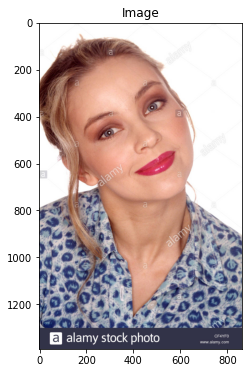

In [ ]:
plt.imshow(im[:,:,::-1])
plt.title("Image")
plt.show()

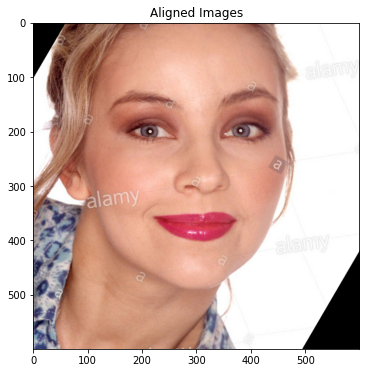

In [ ]:
#Detect landmarks
#im = cv2.imread("/content/face.jpg")
#im = cv2.cvtColor(np.array(im), cv2.COLOR_BGR2GRAY)
points = getLandmarks(faceDetector, landmarkDetector, im)
points = np.array(points)
# Convert image to floating point in range 0 to 1
im = np.float32(im)/255.0
#Dimensions of output image
h = 600
w = 600
# Normalize image to output coordinates
imNorm, points = normalizeImagesAndLandmarks((h,w), im, points)
imNorm = np.uint8(imNorm*255)
#Dispaly results
plt.imshow(imNorm[:,:,::-1])
plt.title("Aligned Images")
plt.show()

In [ ]:
import cv2
import dlib
import numpy as np
import math

# Returns 8 points on the boundary of a rectangle
def getEightBoundaryPoints(h, w):
  boundaryPts = []
  boundaryPts.append((0,0))
  boundaryPts.append((w/2, 0))
  boundaryPts.append((w-1,0))
  boundaryPts.append((w-1, h/2))
  boundaryPts.append((w-1, h-1))
  boundaryPts.append((w/2, h-1))
  boundaryPts.append((0, h-1))
  boundaryPts.append((0, h/2))
  return np.array(boundaryPts, dtype=np.float)


# Constrains points to be inside boundary
def constrainPoint(p, w, h):
  p = (min(max(p[0], 0), w - 1), min(max(p[1], 0), h - 1))
  return p

# convert Dlib shape detector object to list of tuples
def dlibLandmarksToPoints(shape):
  points = []
  for p in shape.parts():
    pt = (p.x, p.y)
    points.append(pt)
  return points

# Compute similarity transform given two sets of two points.
# OpenCV requires 3 pairs of corresponding points.
# We are faking the third one.
def similarityTransform(inPoints, outPoints):
  s60 = math.sin(60*math.pi/180)
  c60 = math.cos(60*math.pi/180)

  inPts = np.copy(inPoints).tolist()
  outPts = np.copy(outPoints).tolist()

  # The third point is calculated so that the three points make an equilateral triangle
  xin = c60*(inPts[0][0] - inPts[1][0]) - s60*(inPts[0][1] - inPts[1][1]) + inPts[1][0]
  yin = s60*(inPts[0][0] - inPts[1][0]) + c60*(inPts[0][1] - inPts[1][1]) + inPts[1][1]

  inPts.append([np.int(xin), np.int(yin)])

  xout = c60*(outPts[0][0] - outPts[1][0]) - s60*(outPts[0][1] - outPts[1][1]) + outPts[1][0]
  yout = s60*(outPts[0][0] - outPts[1][0]) + c60*(outPts[0][1] - outPts[1][1]) + outPts[1][1]

  outPts.append([np.int(xout), np.int(yout)])

  # Now we can use estimateRigidTransform for calculating the similarity transform.
  tform = cv2.estimateAffine2D(np.array([inPts]), np.array([outPts]), False)
  return tform

# Normalizes a facial image to a standard size given by outSize.
# Normalization is done based on Dlib's landmark points passed as pointsIn
# After normalization, left corner of the left eye is at (0.3 * w, h/3 )
# and right corner of the right eye is at ( 0.7 * w, h / 3) where w and h
# are the width and height of outSize.
def normalizeImagesAndLandmarks(outSize, imIn, pointsIn):
  h, w = outSize

  # Corners of the eye in input image
  if len(pointsIn) == 68:
    eyecornerSrc = [pointsIn[36], pointsIn[45]]
  elif len(pointsIn) ==5:
    eyecornerSrc = [pointsIn[2], pointsIn[0]]

  # Corners of the eye in normalized image
  eyecornerDst = [(np.int(0.3 * w), np.int(h/3)), 
                  (np.int(0.7 * w), np.int(h/3))]

  # Calculate similarity transform
  tform = similarityTransform(eyecornerSrc, eyecornerDst)
  imOut = np.zeros(imIn.shape, dtype=imIn.dtype)

  # Apply similarity transform to input image
  imOut = cv2.warpAffine(imIn, tform[0], (w, h))

  # reshape pointsIn from numLandmarks x 2 to numLandmarks x 1 x 2
  points2 = np.reshape(pointsIn, (pointsIn.shape[0], 1, pointsIn.shape[1]))
  
  # Apply similarity transform to landmarks
  pointsOut = cv2.transform(points2, tform[0])

  # reshape pointsOut to numLandmarks x 2
  pointsOut = np.reshape(pointsOut, (pointsIn.shape[0], pointsIn.shape[1]))

  return imOut, pointsOut

# find the point closest to an array of points
# pointsArray is a Nx2 and point is 1x2 ndarray
def findIndex(pointsArray, point):
  dist = np.linalg.norm(pointsArray-point, axis=1)
  minIndex = np.argmin(dist)
  return minIndex


# Check if a point is inside a rectangle
def rectContains(rect, point):
  if point[0] < rect[0]:
    return False
  elif point[1] < rect[1]:
    return False
  elif point[0] > rect[2]:
    return False
  elif point[1] > rect[3]:
    return False
  return True


# Calculate Delaunay triangles for set of points
# Returns the vector of indices of 3 points for each triangle
def calculateDelaunayTriangles(rect, points):

  # Create an instance of Subdiv2D
  subdiv = cv2.Subdiv2D(rect)

  # Insert points into subdiv
  for p in points:
    subdiv.insert((p[0], p[1]))

  # Get Delaunay triangulation
  triangleList = subdiv.getTriangleList()

  # Find the indices of triangles in the points array
  delaunayTri = []

  for t in triangleList:
    # The triangle returned by getTriangleList is
    # a list of 6 coordinates of the 3 points in
    # x1, y1, x2, y2, x3, y3 format.
    # Store triangle as a list of three points
    pt = []
    pt.append((t[0], t[1]))
    pt.append((t[2], t[3]))
    pt.append((t[4], t[5]))

    pt1 = (t[0], t[1])
    pt2 = (t[2], t[3])
    pt3 = (t[4], t[5])

    if rectContains(rect, pt1) and rectContains(rect, pt2) and rectContains(rect, pt3):
      # Variable to store a triangle as indices from list of points
      ind = []
      # Find the index of each vertex in the points list
      for j in range(0, 3):
        for k in range(0, len(points)):
          if(abs(pt[j][0] - points[k][0]) < 1.0 and abs(pt[j][1] - points[k][1]) < 1.0):
            ind.append(k)
        # Store triangulation as a list of indices
      if len(ind) == 3:
        delaunayTri.append((ind[0], ind[1], ind[2]))

  return delaunayTri

# Apply affine transform calculated using srcTri and dstTri to src and
# output an image of size.
def applyAffineTransform(src, srcTri, dstTri, size):

  # Given a pair of triangles, find the affine transform.
  warpMat = cv2.getAffineTransform(np.float32(srcTri), np.float32(dstTri))

  # Apply the Affine Transform just found to the src image
  dst = cv2.warpAffine(src, warpMat, (size[0], size[1]), None,
             flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)

  return dst

# Warps and alpha blends triangular regions from img1 and img2 to img
def warpTriangle(img1, img2, t1, t2):
  # Find bounding rectangle for each triangle
  r1 = cv2.boundingRect(np.float32([t1]))
  r2 = cv2.boundingRect(np.float32([t2]))

  # Offset points by left top corner of the respective rectangles
  t1Rect = []
  t2Rect = []
  t2RectInt = []

  for i in range(0, 3):
    t1Rect.append(((t1[i][0] - r1[0]), (t1[i][1] - r1[1])))
    t2Rect.append(((t2[i][0] - r2[0]), (t2[i][1] - r2[1])))
    t2RectInt.append(((t2[i][0] - r2[0]), (t2[i][1] - r2[1])))

  # Get mask by filling triangle
  mask = np.zeros((r2[3], r2[2], 3), dtype=np.float32)
  cv2.fillConvexPoly(mask, np.int32(t2RectInt), (1.0, 1.0, 1.0), 16, 0)

  # Apply warpImage to small rectangular patches
  img1Rect = img1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]

  size = (r2[2], r2[3])

  img2Rect = applyAffineTransform(img1Rect, t1Rect, t2Rect, size)

  img2Rect = img2Rect * mask

  # Copy triangular region of the rectangular patch to the output image
  img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] * ((1.0, 1.0, 1.0) - mask)
  img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] + img2Rect

# detect facial landmarks in image
def getLandmarks(faceDetector, landmarkDetector, im, FACE_DOWNSAMPLE_RATIO = 1):
  points = []
  imSmall = cv2.resize(im,None,
                       fx=1.0/FACE_DOWNSAMPLE_RATIO, 
                       fy=1.0/FACE_DOWNSAMPLE_RATIO, 
                       interpolation = cv2.INTER_LINEAR)
  
  faceRects = faceDetector(imSmall, 0)
  
  if len(faceRects) > 0:
    maxArea = 0
    maxRect = None
    # TODO: test on images with multiple faces
    for face in faceRects:
      if face.area() > maxArea:
        maxArea = face.area()
        maxRect = [face.left(),
                   face.top(),
                   face.right(),
                   face.bottom()
                  ]
    
    rect = dlib.rectangle(*maxRect)
    scaledRect = dlib.rectangle(int(rect.left()*FACE_DOWNSAMPLE_RATIO),
                             int(rect.top()*FACE_DOWNSAMPLE_RATIO),
                             int(rect.right()*FACE_DOWNSAMPLE_RATIO),
                             int(rect.bottom()*FACE_DOWNSAMPLE_RATIO))
    
    landmarks = landmarkDetector(im, scaledRect)
    points = dlibLandmarksToPoints(landmarks)
  return points

# Warps an image in a piecewise affine manner.
# The warp is defined by the movement of landmark points specified by pointsIn
# to a new location specified by pointsOut. The triangulation beween points is specified
# by their indices in delaunayTri.
def warpImage(imIn, pointsIn, pointsOut, delaunayTri):
  h, w, ch = imIn.shape
  # Output image
  imOut = np.zeros(imIn.shape, dtype=imIn.dtype)

  # Warp each input triangle to output triangle.
  # The triangulation is specified by delaunayTri
  for j in range(0, len(delaunayTri)):
    # Input and output points corresponding to jth triangle
    tin = []
    tout = []

    for k in range(0, 3):
      # Extract a vertex of input triangle
      pIn = pointsIn[delaunayTri[j][k]]
      # Make sure the vertex is inside the image.
      pIn = constrainPoint(pIn, w, h)

      # Extract a vertex of the output triangle
      pOut = pointsOut[delaunayTri[j][k]]
      # Make sure the vertex is inside the image.
      pOut = constrainPoint(pOut, w, h)

      # Push the input vertex into input triangle
      tin.append(pIn)
      # Push the output vertex into output triangle
      tout.append(pOut)

    # Warp pixels inside input triangle to output triangle.
    warpTriangle(imIn, imOut, tin, tout)
  return imOut

In [ ]:
img2 = cv2.imread("/content/ranveer.jfif")
img1 = cv2.imread("/content/hrithik.jpg")

im1Display = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
im2Display = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img1Wrapped = np.copy(img2)

(-0.5, 224.5, 224.5, -0.5)

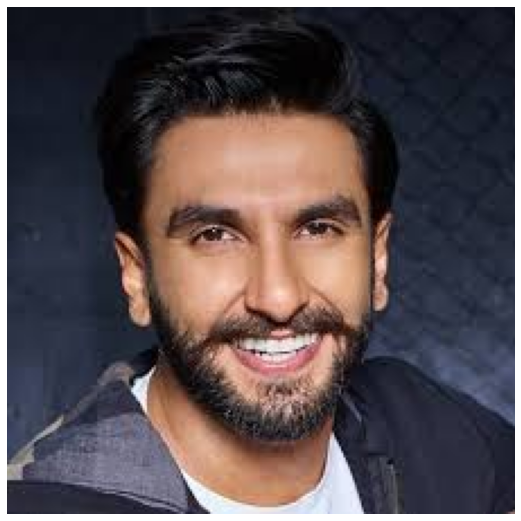

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121); plt.imshow(im2Display); plt.axis('off')


(-0.5, 539.5, 959.5, -0.5)

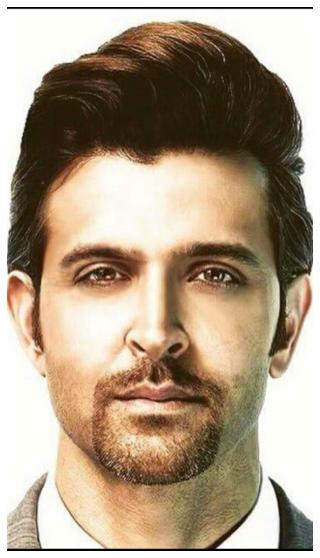

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121); plt.imshow(im1Display); plt.axis('off')

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

--2020-08-12 16:39:22--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  21.2MB/s    in 2.9s    

2020-08-12 16:39:25 (21.2 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
#read array of corresponding points
points1 = getLandmarks(detector, predictor, img1)
points2 = getLandmarks(detector, predictor, img2)

(-0.5, 224.5, 224.5, -0.5)

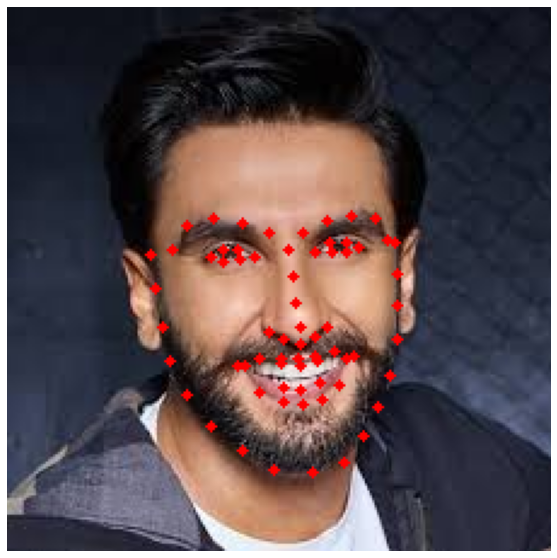

In [ ]:
#Display landmarks
imTemp = im2Display.copy()
for p in points2:
  cv2.circle(imTemp, p, 2, (255,0,0), -1)
plt.figure(figsize = (20,10)); plt.imshow(imTemp); plt.axis('off')

(-0.5, 539.5, 959.5, -0.5)

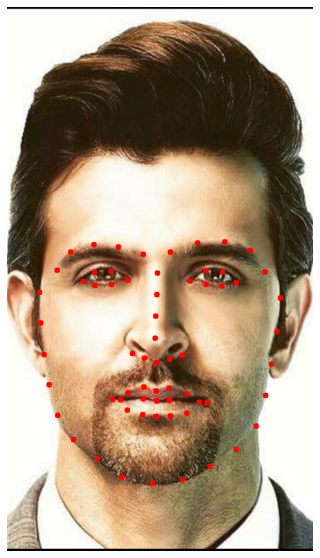

In [ ]:
imTemp = im1Display.copy()
for p in points1:
  cv2.circle(imTemp, p, 5, (255,0,0), -1)
plt.figure(figsize = (20,10)); plt.imshow(imTemp); plt.axis('off')

In [ ]:
# Find convex hull
hullIndex = cv2.convexHull(np.array(points2), returnPoints = False)

#create convex hull lists
hull1 =[]
hull2 = []
for i in range(0, len(hullIndex)):
  hull1.append(points1[hullIndex[i][0]])
  hull2.append(points2[hullIndex[i][0]])

(-0.5, 224.5, 224.5, -0.5)

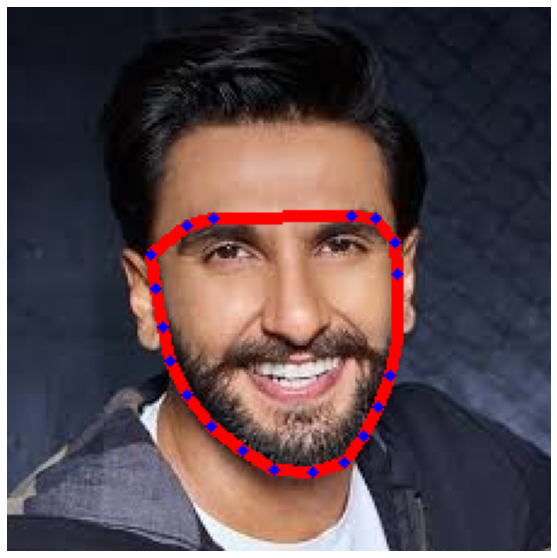

In [ ]:
# Display convex hull
imTemp = im2Display.copy()
numPoints = len(hull2)
for i in range(0,numPoints):
  cv2.line(imTemp, hull2[i], hull2[(i+1)%numPoints], (255,0,0), 3)
  cv2.circle(imTemp, hull2[i], 2, (0,0,255), -1)
plt.figure(figsize = (20,10)); plt.imshow(imTemp); plt.axis('off')

In [ ]:
#calculate mask for seamless cloaning
hull8U = []
for i in range(0, len(hull2)):
  hull8U.append((hull2[i][0], hull2[i][1]))
mask = np.zeros(img2.shape, dtype = img2.dtype)
cv2.fillConvexPoly(mask, np.int32(hull8U), (255,255,255))

#Find Centroid
m = cv2.moments(mask[:,:,1])
center = (int(m['m10']/m['m00']), int(m['m01']/m['m00']))

(-0.5, 224.5, 224.5, -0.5)

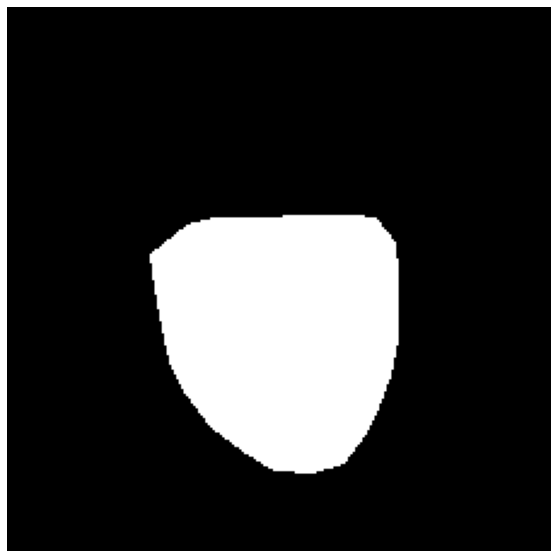

In [ ]:
#Display mask
plt.figure(figsize=(20,10)); plt.imshow(mask); plt.axis('off')

In [ ]:
#Find Delaunay triangulation for convex hull points
sizeImg2 = img2.shape
rect = (0,0, sizeImg2[1], sizeImg2[0])
dt = calculateDelaunayTriangles(rect, hull2)

#If no Delaunay Triangles were found, quit
if len(dt) == 0:
  quit()

In [ ]:
imTemp1 = im1Display.copy()
imTemp2 = im2Display.copy()

tris1 = []
tris2 = []
for i in range(0, len(dt)):
  tri1 = []
  tri2 = []
  for j in range(0, 3):
    tri1.append(hull1[dt[i][j]])
    tri2.append(hull2[dt[i][j]])
  tris1.append(tri1)
  tris2.append(tri2)
cv2.polylines(imTemp1, np.array(tris1), True, (0,0,255),2);
cv2.polylines(imTemp2, np.array(tris2), True, (0,0,255),1);

(-0.5, 539.5, 959.5, -0.5)

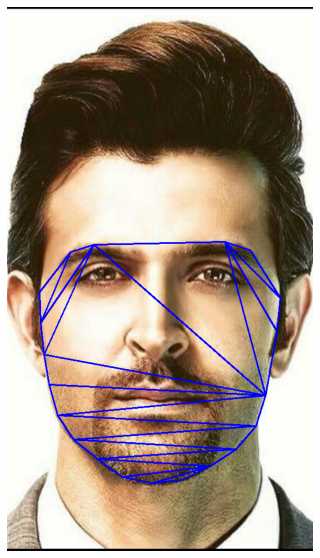

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121); plt.imshow(imTemp1); plt.axis('off')

(-0.5, 224.5, 224.5, -0.5)

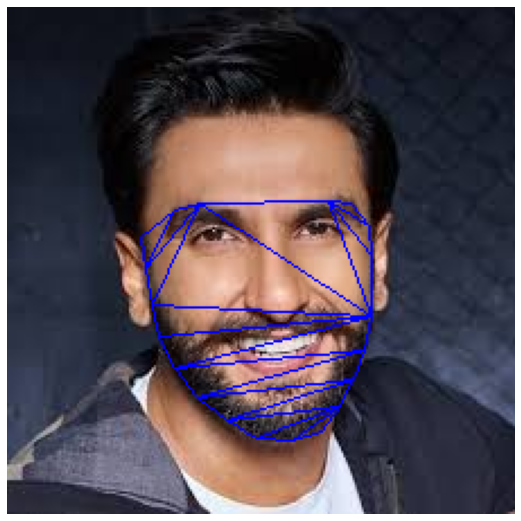

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121); plt.imshow(imTemp2); plt.axis('off')

(-0.5, 224.5, 224.5, -0.5)

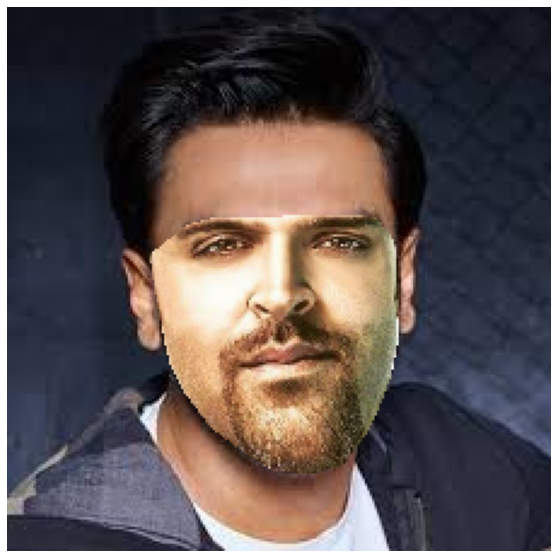

In [ ]:
#Simply alpha blending
for i in range(0, len(tris1)):
  warpTriangle(img1, img1Wrapped, tris1[i], tris2[i])
plt.figure(figsize=(20,10));
plt.imshow(np.uint8(img1Wrapped)[:,:,::-1]); plt.axis('off')

In [ ]:
output = cv2.seamlessClone(np.uint8(img1Wrapped), img2, mask, center, cv2.NORMAL_CLONE)

(-0.5, 224.5, 224.5, -0.5)

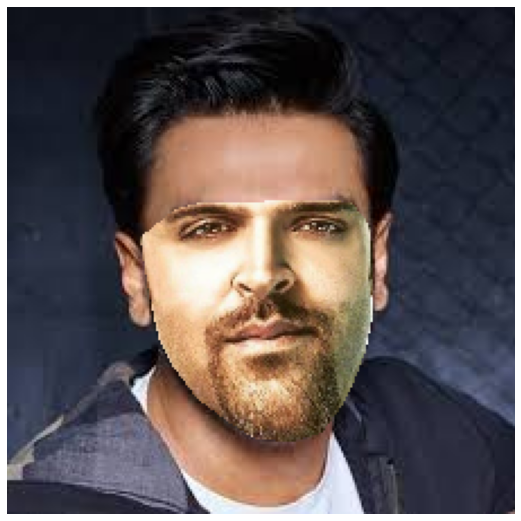

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot((121)); plt.imshow(np.uint8(img1Wrapped)[:,:,::-1]); plt.axis('off')


(-0.5, 224.5, 224.5, -0.5)

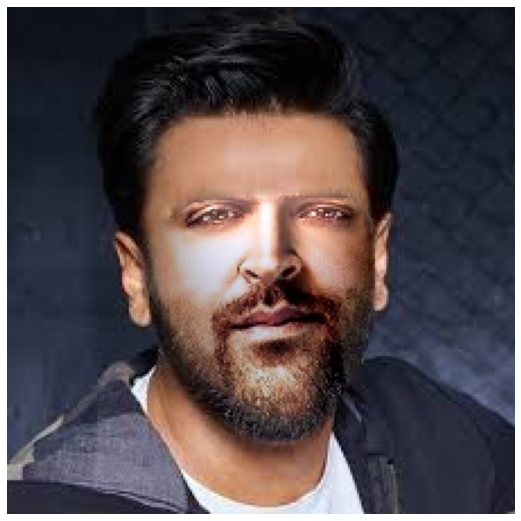

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot((121)); plt.imshow(output[:,:,::-1]); plt.axis('off')